# Iterator 

## Iterator definitions in C++
### General
http://www.cplusplus.com/reference/iterator/  
An iterator is any object that, pointing to some element in a range of elements (such as an array or a container), has the ability to iterate through the elements of that range using a set of operators (**with at least the increment (++) and dereference operators)**. My comments: for languages without pointer, ++ is usually the next() function. 

**The most obvious form of iterator is a pointer**: A pointer can point to elements in an array, and can iterate through them using the increment operator (++). But other kinds of iterators are possible. For example, each container type (such as a list) has a specific iterator type designed to iterate through its elements. 

Notice that while a pointer is a form of iterator, not all iterators have the same functionality of pointers; Depending on the properties supported by iterators, they are classified into five different categories.  

Input and output iterators are the most limited types of iterators: they can perform sequential single-pass input or output operations.  Forward iterators have all the functionality of input iterators and -if they are not constant iterators- also the functionality of output iterators, although they are limited to one direction in which to iterate through a range (forward). **All standard containers support at least forward iterator types.** Bidirectional iterators are like forward iterators but can also be iterated through backwards. Random-access iterators implement all the functionality of bidirectional iterators, and also have the ability to access ranges non-sequentially: distant elements can be accessed directly by applying an offset value to an iterator without iterating through all the elements in between. These iterators have a similar functionality to standard pointers (pointers are iterators of this category). 


### Iterator is an object
Pointer is also a type. So it can be taken as a class object, but a simple object. Just like int is also a type, or a class instance. Pointer is the simple iterator.  Other iterator (class object) can be very complicated. For example, `std::vector<int>::iterator`, etc.

Depending on what types, a pointer can be random-access iterator (e.g. iterator for vector, deque, array), bidirectional iterator(e.g. linked list, set, map), or forward iterator (e.g. forward list).... So an pointer is not a fix-type iterator.

Iterator (including the Python generator) is an object, and thus it is not like a function. Function normally stored in stack and will be destroyed when returned. An object is stored in heap, and will be destroyed when required. So it can keep state and resume from previous state. In python, function is also an object, where is it stored?   

Smart pointer, although can be implemented with the minimum requirements of iterator object, I think we cannot use it as an iterator. For example, the shared_ptr is used as a reference-counter pointer. If we ++ or -- the pointer externally, then it will have big problem. 
    

### Iterator examples for C++
https://www.youtube.com/watch?v=vO2AlrBf5rQ
Random-access iterator: ++itr; --iter; advance +/- bias. vector, deque, array provide random-access iterator. Therefore, they all should overload `[]`.

* Bidirectional iterator: ++itr, --itr, but cannot advance arbitrary bias. linked list, set, map provide such iterators.
* Forward iterator: forward_list`<int>` for example. Unordered containers provide at least forward iterators. Sometimes also provide bidirectional iterators.
* input iterator: read and process value while iterating forward; `*iter`. Of course we can ++iter because this is the minimum requirement of iterator. 
* output iterator. output values while iterating forward; also can ++iter. `*iter`= 100.

The above link also introduces **Iterator Adaptor, i.e. predefined iterators that achieve more powerful actions such as:**  
* insert iterator.
* stream iterator.
* reverse iterator.
* move iterator. (c++ 11) 

The above link also introduces that an iterator for any container type has a constant iterator. When iterating over with constant iterator, we cannot modify the contents pointed by the iterator. 

### Ways to obtain iterator in C++
* Primitive type such as pointer is already an iterator. 
* Standard iterator defined in STL, constant iterator, iterator adapter (see explanation below)
* Construct iterator by myself.


### Implementation of iterator class
https://www.geeksforgeeks.org/input-iterators-in-cpp/  
* Input iterator example  
<strong>// Definition of std::find()</strong>  
template  
InputIterator find (InputIterator first, InputIterator last,  const T&amp; val)  
{  
    while (first!=last)   
    {  
        if (*first==val) return first;  
        ++first;  
    }  
    return last;  
}   

* Output iterator example 
<strong>// Definition of std::copy()</strong>  
template  
OutputIterator copy(InputIterator first, InputIterator last, OutputIterator result)  
{  
    while (first != last)   
    `*result++ = *first++;`
    return result;  
}  
* Other iterators include, i.e., std::vector`<T>`::iterator... All other iterators are much difficult to implement.

### C++ equivalent of generator
https://stackoverflow.com/questions/9059187/equivalent-c-to-python-generator-pattern

Generators exist in C++, just under another name: Input Iterators. For example, reading from std::cin is similar to having a generator of char.  
You simply need to understand what a generator does:  
there is a blob of data: the local variables define a state  
there is an init method  
there is a "next" method  
there is a way to signal termination  
See details in the link.  


## Iterables and  Iterators in Python

### Defintions
* The iterable needs either a method '__iter__', which returns an iterator, or a '__getitem__' method with sequential indexes starting with 0. So we can check whether __iter__ method exists to see whether an object is an iterable, right? I think the reason to have a __iter__ in an iterable is that this iterable object can return an iterator by calling object.__iter__(), or iter(object). Both ways will return an iterator object, i.e., it will produce an extra __next__ method. 
* In Python, an iterator is an object which implements the iterator protocol. That is: the iterator protocol consists of two methods. The __iter__() method, which must return the iterator object, and the __next__ method, which returns the next element from a sequence.  NOTE: later I  have an example, that I can use next() on an object which has not __iter__ but only have __next__ defined.
* From the two definitions above (for python, C++ is bit different), iterator has an extra method __next()__ defined. So an iterator must be an iterable, but an iterable is not necessarily an iterator. For example, a list is an iterable but not an iterator. 

### Properties
* Iterator is an object that KEEPS STATE and produces the next value when you call __next__() on it. The syntax is a = iterator_object.__iter__(), then a is just the iterator_object, b= iterator_object.__next__() will return next value. Note here, keeping state is not the special thing of generator. It is the property of iterator and generator is just an iterator.
*  Note  these two methods are different from the python built-in funcitons iter() and next(). python iter() accept iterable as argument, while __iter__ only works as a method (attibute) of iterator object. In other words, __iter__() does not have an argument. However, iter() and __iter__ are also connected, as seen later. 
* So what is going on behind the scenes, when a for loop is executed? The for statement calls iter() on the object ( which should be a so-called container object), which it is supposed to loop over. If this call is successful, the iter call will return return an iterator object that defines the method __next__() which accesses elements of the object one at a time.  You can call the __next__() method using the next() built-in function. This is how it works:


In [13]:
cities = ["Berlin", "Vienna", "Zurich"]
iterator_obj = iter(cities)
print(iterator_obj)
print(next(iterator_obj))
print(next(iterator_obj))
print(next(iterator_obj))

Berlin
Vienna
Zurich


* However, note that next() and __next__ keep the same state. So when you call the two functions in an intermixed way, both of them advance the iterator. Finally note that we need to underscore in each side of the methods above. For python_2 there are not underscores. For legacy code, we need change next() within a class (not the build-in next() of python) to __next__().
* Often, for pragmatic reasons, iterable classes will implement both __iter__  and __next__ in the same class, and have __iter__ return self, which makes the class both an iterable and its own iterator. It is perfectly fine to return a different object as the iterator, though. How about in C++? It has a separate iterator class? 

### How to judge whether an object is iterable or iterator

In [12]:
# [1] Use dir(object) to check whether the object has __iter__, and/or __next__ (python 2, next). This is not so good.
# [2] Use hasattr(object, '__iter__'), hasattr(object, '__next__') or hasattr(object, 'next') for python 2.

a = [1,2,3]
b = a.__iter__()
next(b)
next(b)
#As above, we can also use .__iter__() to transform an iterable to an iterator.

c = [1,2];
hasattr(c, '__iter__') # True
hasattr(c, '__next__') # False. This indicate a list is not an iterator.

c.__iter__()
hasattr(c, '__next__') #False. Is this indicating, c.__iter_() does not directly applied to c?
hasattr(c.__iter__(), '__next__') #True

d = c.__iter__()
hasattr(d, '__next__') #True

# [3] Use built-in iter() to check whether it is an iterable. 

# [4] Use next() to check whether it is an iterator. 


True

### Ways to obtain iterator in Python

* Apply iter() to an iterable object, or apply the .__iter__() of the object. 
* Using generator expression. 
* Using generator function. 
* Directly build an iterator class by including __iter()__ and __next__(). 

Note although the generator returns a generator object, it is actually an iterator. It is just a little bit special, as it is used to generate things without generating all of them in memory. Also it can suspend and resume. 

### Building an iterator class -- example 1

We have described how an iterator works. So if you want to add an iterator behavior to your class, you have to add the __iter__and the __next__ method to your class. The __iter__ method returns an iterator object. If the class contains a __next__, it is enough for the __iter__ method to return self, i.e. a reference to itself:

In [43]:
class Reverse:
    """
    Creates Iterators for looping over a sequence backwards.
    """
    
    def __init__(self, data):
        self.data = data
        self.index = len(data)
    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index - 1
        return self.data[self.index]
lst = [34, 978, 42]
lst_backwards = Reverse(lst)

for el in lst_backwards:
     print(el)
#See earlier notes, for statement will call __iter__. If __iter__ is not exist, there will be
#Errors: Reverse object is non-iterable.
#If __iter__ is there but __next__ is not, then there will be 
#Errors: iter() returned non-iterator of type "Reverse". 

#However, if we use next() [comment for loop], then even without __iter__ method, we can still
#obtain correct results. This seems suggest that an iterator class can be without __iter__ method, right?
# print(next(lst_backwards))
# print(next(lst_backwards))

        

42
978
34



# Generators
In this section of the course we will be learning the difference between iteration and generation in Python and how to construct our own Generators with the *yield* statement. Generators allow us to generate as we go along, instead of holding everything in memory.**I need fully understand this point.** 

We've touched on this topic in the past when discussing certain built-in Python functions like range(), map() and filter().

Let's explore a little deeper. We've learned how to create functions with <code>def</code> and the <code>return</code> statement. Generator functions allow us to write a function that can send back a value and then **later resume to pick up where it left off. How is this implemented in background?**. This type of function is a generator in Python, allowing us to generate a sequence of values over time. The main difference in syntax will be the use of a <code>yield</code> statement.

In most aspects, a generator function will appear very similar to a normal function. The **main difference** is when a generator function is compiled they become an object that supports an **iteration protocol**. That means when they are called in your code they don't actually return a value and then exit. Instead, generator functions will automatically suspend and resume their execution and state around the last point of value generation. The main advantage here is that instead of having to compute an entire series of values up front, the generator computes one value and then suspends its activity awaiting the next instruction. This feature is known as **state suspension**.


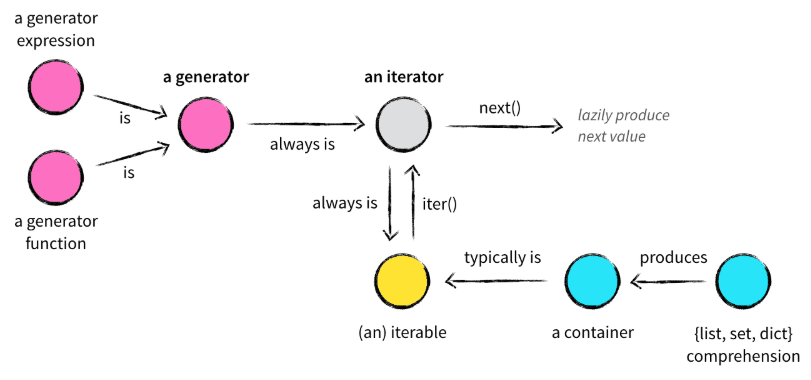



**Create a generator that generates the squares of numbers up to some number N.**

In [1]:
def gensquares(N):
    for i in range(N):
        yield i**2

In [2]:
for x in gensquares(3):
    print(x)

0
1
4


In [3]:
import random
random.randint(1,10)

5

In [4]:
def rand_num(low,high,n):
    for i in range(n):
        yield random.randint(low, high)

In [5]:
for num in rand_num(1,10,5):
    print(num)

8
5
10
10
9


In [7]:
my_list = [1,2,3,4,5]

gencomp = (item for item in my_list if item > 3) #generator comprehension

for item in gencomp:
    print(item)

4
5


In [ ]:
# Create generator object: result
result = (num for num in range(31))


### What should we know about python generator
* Generator is an iterator object. Either generator expression or generator function returns a generator object which is an iterator in the first place. However, not every iterator is a generator. `[1]`Generator in python has the feature of generating objects without using big memory. That is, it generate upon request. `[2]`. Generator can suspend and resume upon request. `[3]` Generator provide a simple way to produce an iterator. Otherwise, an iterator is not easy to implement. See example later.

* Using generator can implement a very simple way to generate Fibonacci numbers, as shown later.


### Difference between generator and iterator
https://stackoverflow.com/questions/2776829/difference-between-pythons-generators-and-iterators  
iterator is a more general concept: any object whose class has a next method (__next__ in Python 3) and an __iter__ method that does return self. (In C++, the minimum requirement for iterator is ++itr, and dereference.

Every generator is an iterator, but not vice versa. A generator is built by calling a function that has one or more yield expressions (yield statements, in Python 2.5 and earlier), and is an object that meets the previous paragraph's definition of an iterator.

You may want to use a custom iterator, rather than a generator, when you need a class with somewhat complex state-maintaining behavior, or want to expose other methods besides next (and __iter__ and __init__). Most often, a generator (sometimes, for sufficiently simple needs, a generator expression) is sufficient, and it's simpler to code because state maintenance (within reasonable limits) is basically "done for you" by the frame getting suspended and resumed. **So basically generator provides a simpler way for you to produce a special iterator that can generate, suspend, and resume.** 

For example, a generator such as:

def squares(start, stop):  
    for i in range(start, stop):  
        yield i * i  

generator = squares(a, b)  
or the equivalent generator expression (genexp)  

generator = (i*i for i in range(a, b)) would take more code to build as a custom iterator:

class Squares(object):
    def __init__(self, start, stop):
       self.start = start
       self.stop = stop
    def __iter__(self): return self
    def next(self): #In Python 3, it should be def __next__(self):
       if self.start >= self.stop:
           raise StopIteration
       current = self.start * self.start
       self.start += 1
       return current

iterator = Squares(a, b)
But, of course, with class Squares you could easily offer extra methods, i.e.

    def current(self):
       return self.start
if you have any actual need for such extra functionality in your application.

**Note how to implement an iterator class and thus fully understand its fundamentals**. 

### Building an iterator class -- another example 
Iterator objects in python conform to the iterator protocol, which basically means they provide two methods: __iter__() and  next(). The __iter__ returns the iterator object and is implicitly called at the start of loops. The next() method returns the next value and is implicitly called at each loop increment.  next() raises a StopIteration exception when there are no more value to return, which is implicitly captured by looping constructs to stop iterating.

Here's a simple example of a counter:

In [4]:
class Counter:
    def __init__(self, low, high):
        self.current = low
        self.high = high

    def __iter__(self):
        return self

    def __next__(self): # Python 2 def next(self)
        if self.current > self.high:
            raise StopIteration
        else:
            self.current += 1
            return self.current - 1


for c in Counter(3, 8):
    print (c)
    
iterator = Counter(5, 12)
print(type(iterator))


3
4
5
6
7
8
<class '__main__.Counter'>


### Iterators and Generators Examples from Python course

In [1]:
# Generator function for the cube of numbers (power of 3)
def gencubes(n):
    for num in range(n):
        yield num**3

In [2]:
for x in gencubes(10):
    print(x)

0
1
8
27
64
125
216
343
512
729


Compare generator, iterator, c++ pointer, and function!  

Great! Now since we have a generator function we don't have to keep track of every single cube we created.

Generators are best for calculating large sets of results (particularly in calculations that involve loops themselves) in cases where we don’t want to allocate the memory for all of the results at the same time. 

Let's create another example generator which calculates [fibonacci](https://en.wikipedia.org/wiki/Fibonacci_number) numbers:

**Except using generator, another key points is the use of a,b = b,a+b. This way we can save some hassles. Moreover, fibonacci number can also be generated by a recursive function. If we keep all calculated fibonacci number within the memory, we can significantly increase the speed (dynamic programming). How these two methods compared to the approach here?
In C++, I tried a, b = b,a+b, it seems not work. But definitely I should implement one, with the similar idea of generator.**

In [3]:
def genfibon(n):
    """
    Generate a fibonnaci sequence up to n
    """
    a = 1
    b = 1
    for i in range(n):
        yield a
        a,b = b,a+b

In [4]:
for num in genfibon(10):
    print(num)

1
1
2
3
5
8
13
21
34
55


What if this was a normal function, what would it look like?

In [5]:
def fibon(n):
    a = 1
    b = 1
    output = []
    
    for i in range(n):
        output.append(a)
        a,b = b,a+b
        
    return output

In [6]:
fibon(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Notice that if we call some huge value of n (like 100000) the second function will have to keep track of every single result, when in our case we actually only care about the previous result to generate the next one!

## next() and iter() built-in functions

**A key to fully understanding generators is the next() function and the iter() function.**

The next() function allows us to access the next element in a sequence. Lets check it out:

In [1]:
def simple_gen():
    for x in range(3):
        yield x

In [2]:
# Assign simple_gen 
g = simple_gen()

In [3]:
print(next(g))

0


In [4]:
print(next(g))

1


In [5]:
print(next(g))

2


In [6]:
print(next(g))

StopIteration: 

After yielding all the values next() caused a StopIteration error. What this error informs us of is that all the values have been yielded. 

You might be wondering that why don’t we get this error while using a for loop? A for loop automatically catches this error and stops calling next(). 

Let's go ahead and check out how to use iter(). You remember that strings are iterables:

In [7]:
s = 'hello'

#Iterate over string
for let in s:
    print(let)

h
e
l
l
o


But that doesn't mean the string itself is an *iterator*! We can check this with the next() function:

In [8]:
next(s)

TypeError: 'str' object is not an iterator

Interesting, this means that a string object supports iteration, but we can not directly iterate over it as we could with a generator function. The iter() function allows us to do just that!

In [9]:
s_iter = iter(s)

In [10]:
next(s_iter)

'h'

In [17]:
next(s_iter)

'e'

Great! Now you know how to convert objects that are iterable into iterators themselves!

The main takeaway from this lecture is that using the yield keyword at a function will cause the function to become a generator. This change can save you a lot of memory for large use cases. For more information on generators check out:

[Stack Overflow Answer](http://stackoverflow.com/questions/1756096/understanding-generators-in-python)

[Another StackOverflow Answer](http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python)

## Print out a linked list
move to linked list in data structure

In [5]:

# node class
class Node(object):
    def __init__(self, value):
        self.value = value
        self.next = None

# singly linked list class
class SinglyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None

#The following way is a simple to add a few nodes. 
#If a lot to add, then we need add() method within the LinkedList class. 
linked_list = SinglyLinkedList()
linked_list.head = Node('Alice')
linked_list.head.next = Node('Chad')
linked_list.head.next.next = Node('Debra')


#Method 1.
#print( linked_list.head.value, linked_list.head.next.value, linked_list.head.next.next.value)

node = linked_list.head
while node:
    print (node.value)
    node = node.next
    


Alice
Chad
Debra


In the above code, the class SinglyLinkedList is so simple and thus is unnecessary. As I did in many simple linked list examples where I just use the ListNode class to form a simple linked list, here I can do the same thing. **So there are two different ways to construct a linked list**. A simple way and a formal way. The formal way needs a function to add node, delete node, etc. 

In [ ]:
# node class
class Node(object):
    def __init__(self, value):
        self.value = value
        self.next = None

linked_list = Node('Alice')
linked_list.next = Node('Chad')
linked_list.next.next = Node('Debra')

node = linked_list
while node:
    print (node.value)
    node = node.next

Now a more formal linked list. However, it did not implement a next() method. But its __iter__ method is different from the normal __iter__ method. It seems try to replace the function of __next__().

**Note there is no __next__ method defined in the following method. 

In [48]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.next = None

class SinglyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None

    def __iter__(self):
        node = linked_list.head
        while node:
            yield node
            node = node.next

    def add(self, node):
        if self.head:
            self.tail.next = node
        else:
            self.head = node

        self.tail = node

linked_list = SinglyLinkedList()
linked_list.add(Node('Alice'))
linked_list.add(Node('Chad'))
linked_list.add(Node('Debra'))

print ([node.value for node in linked_list])

['Alice', 'Chad', 'Debra']


# Decorators

The key of decorator is to pass a function reference to itself, and do something before or after the passed in function. The function reference passed in sometimes also contain parameters. 

Decorators can be thought of as **functions** which modify the *functionality* of another function. They help to make your code shorter and more "Pythonic". **Comments: here we consider only function decorator. In fact, there is also class decorator.**

To properly explain decorators we will slowly build up from functions. Make sure to run every cell in this Notebook for this lecture to look the same on your own computer.<br><br>So let's break down the steps:

## Functions Review

In [1]:
def func():
    return 1

In [2]:
func()

1

## Scope Review
Remember from the nested statements lecture that Python uses Scope to know what a label is referring to. For example:

In [1]:
s = 'Global Variable'

def check_for_locals():
    print(locals())

Remember that Python functions create a new scope, meaning the function has its own namespace to find variable names when they are mentioned within the function. We can check for local variables and global variables with the <code>locals()</code> and <code>globals()</code> functions. For example:

In [2]:
print(globals());

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "s = 'Global Variable'\n\ndef check_for_locals():\n    print(locals())", 'print(globals());'], '_oh': {}, '_dh': ['C:\\Users\\ljyan\\Desktop\\courseNotes\\dataScience\\programming\\python\\pythonFundamentals'], 'In': ['', "s = 'Global Variable'\n\ndef check_for_locals():\n    print(locals())", 'print(globals());'], 'Out': {}, 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x000002CA45F89C88>>, 'exit': <IPython.core.autocall.ZMQExitAutocall object at 0x000002CA45FDBEF0>, 'quit': <IPython.core.autocall.ZMQExitAutocall object at 0x000002CA45FDBEF0>, '_': '', '__': '', '___': '', '_i': "s = 'Global Variable'\n\ndef check_for_locals():\n    print(locals())", '_ii

Here we get back a dictionary of all the global variables, many of them are predefined in Python. So let's go ahead and look at the keys:

In [8]:
print(globals().keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 's', 'check_for_locals', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8'])


Note how **s** is there, the Global Variable we defined as a string:

In [3]:
globals()['s']

'Global Variable'

Now let's run our function to check for local variables that might exist inside our function (there shouldn't be any)

In [4]:
check_for_locals()

{}


Great! Now lets continue with building out the logic of what a decorator is. Remember that in Python **everything is an object**. That means **functions are objects which can be assigned labels and passed into other functions**. 

In [11]:
def hello(name='Jose'):
    return 'Hello '+name

In [12]:
hello()

'Hello Jose'

Assign another label to the function. Note that we are not using parentheses here because we are not calling the function **hello**, instead we are just passing a function object to the **greet** variable.

In [13]:
greet = hello

In [14]:
greet

<function __main__.hello>

In [15]:
greet()

'Hello Jose'

So what happens when we delete the name **hello**?

In [16]:
del hello

In [17]:
hello()

NameError: name 'hello' is not defined

In [10]:
greet()

'Hello Jose'

Even though we deleted the name **hello**, the name **greet** *still points to* our original function object. It is important to know that functions are objects that can be passed to other objects! **Comments: del removes a reference to an object. If there is another reference pointing to the same object, then 'del' will not destroy the object**. 

## Functions within functions
Great! So we've seen how we can treat functions as objects, now let's see how we can define functions inside of other functions:

In [5]:
def hello(name='Jose'):
    print('The hello() function has been executed')
    
    def greet():
        return '\t This is inside the greet() function'
    
    def welcome():
        return "\t This is inside the welcome() function"
    
    print(greet())
    print(welcome())
    print("Now we are back inside the hello() function")

In [6]:
hello()

The hello() function has been executed
	 This is inside the greet() function
	 This is inside the welcome() function
Now we are back inside the hello() function


In [7]:
welcome()

NameError: name 'welcome' is not defined

Note how due to scope, the welcome() function is not defined outside of the hello() function. Now lets learn about returning functions from within functions:
## Returning Functions

In [10]:
def hello(name='Jose'):
    
    def greet():
        return '\t This is inside the greet() function'
    
    def welcome():
        return "\t This is inside the welcome() function"
    
    if name == 'Jose':
        return greet
    else:
        return welcome

Now let's see what function is returned if we set x = hello(), note how the empty parentheses means that name has been defined as Jose.

In [11]:
x = hello()

In [12]:
x

<function __main__.hello.<locals>.greet>

Great! Now we can see how x is pointing to the greet function inside of the hello function.

In [13]:
print(x())

	 This is inside the greet() function


In the <code>if</code>/<code>else</code> clause we are returning <code>greet</code> and <code>welcome</code>, not <code>greet()</code> and <code>welcome()</code>. 

This is because when you put a pair of parentheses after it, the function gets executed; whereas if you don’t put parentheses after it, then it can be passed around and can be assigned to other variables without executing it.

When we write <code>x = hello()</code>, hello() gets executed and because the name is Jose by default, the function <code>greet</code> is returned. If we change the statement to <code>x = hello(name = "Sam")</code> then the <code>welcome</code> function will be returned. We can also do <code>print(hello()())</code> which outputs *This is inside the greet() function*.

In [37]:
hello()()

'\t This is inside the greet() function'

* hello() returns a greet object, and thus hello()() is just greet(). The key here is: greet was originally a local function. Here using returning functions, we can call it in a global space. 

* ** For defined function func(), be sensitive to the difference between func and func(). 

## Functions as Arguments
Now let's see how we can pass functions as arguments into other functions:

In [14]:
def hello():
    return 'Hi Jose!'

def other(func):
    print('Other code would go here')
    print(func())

In [15]:
other(hello)

Other code would go here
Hi Jose!


Great! Note how we can pass the functions as objects and then use them within other functions. Now we can get started with writing our first decorator:

## Creating a Decorator
In the previous example we actually manually created a Decorator. Here we will modify it to make its use case clear:

In [16]:
def new_decorator(func):

    def wrap_func():
        print("Code would be here, before executing the func")

        func()

        print("Code here will execute after the func()")

    return wrap_func

def func_needs_decorator():
    print("This function is in need of a Decorator")

In [17]:
func_needs_decorator()

This function is in need of a Decorator


In [22]:
# Reassign func_needs_decorator
func_needs_decorator = new_decorator(func_needs_decorator)

In [23]:
func_needs_decorator()

Code would be here, before executing the func
This function is in need of a Decorator
Code here will execute after the func()


So what just happened here? **A decorator simply wrapped the function and modified its behavior. So it is just a wrapper?** Now let's understand how we can rewrite this code using the @ symbol, which is what Python uses for Decorators:

In [20]:
@new_decorator
def func_needs_decorator():
    print("This function is in need of a Decorator")

In [21]:
func_needs_decorator()

Code would be here, before executing the func
This function is in need of a Decorator
Code here will execute after the func()
